In [11]:
%plot --format svg

In [12]:
setdefaults

# Paying off a car/house/boat/... with a loan

You take a loan of some amount P, and the lender says you can pay any monthly payment you want, but at the end of the loan time, T, you have to pay the difference left over. 

What monthly payment should you use so that you have $0 at the end of the loan time, T? with an interest rate of R?

In [25]:
function amount_left = loan_payments(monthly_payment,price,apr,no_of_years,plot_bool)
  % loan_payments(monthly_payment,price,apr,no_of_years) calculates the principal amount
  % left over on a loan if 
  % the monthly payment is "monthly_payment"
  % the price of the loan is "price"
  % the annual percent rate of interest is "apr" (compounded monthly)
  % and the number of years the loan is paid is "no_of_years"
  % plot_bool=0,1 if the principle left should be plotted no,yes
  interest_per_month = apr/12;
  number_of_months = no_of_years*12;
  principle=price;
  P_vector=zeros(1,number_of_months);
  for i = 1:number_of_months
    principle=principle-monthly_payment;
    principle=(1+interest_per_month)*principle;
    P_vector(i)=principle;
  end
  amount_left=principle;
  if plot_bool
    figure(1)
    plot([1:number_of_months]/12, P_vector,'o')
    xlabel('time (years)')
    ylabel('principle amount left ($)')
  end
end

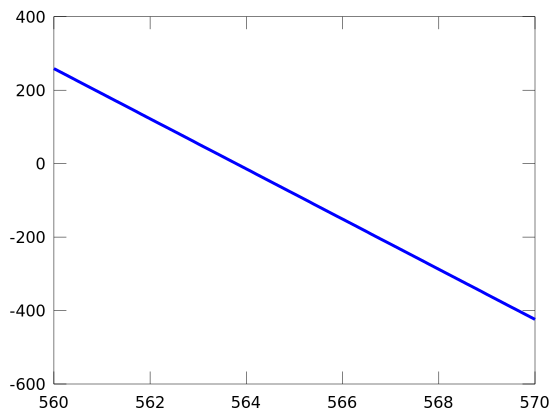

In [34]:
setdefaults
i=0;
maxP=570;
minP=560;
stepsize=(maxP-minP)/100;
for P=[minP:stepsize:maxP]
    i=i+1;
    A(i)=loan_payments(P,30000,0.05,5,0);
end
plot([minP:stepsize:maxP],A)

## Matlab's function

Matlab and Octave combine bracketing and open methods in the `fzero` function. 

In [35]:
help fzero

'fzero' is a function from the file /usr/share/octave/4.0.0/m/optimization/fzero.m

 -- Function File: fzero (FUN, X0)
 -- Function File: fzero (FUN, X0, OPTIONS)
 -- Function File: [X, FVAL, INFO, OUTPUT] = fzero (...)
     Find a zero of a univariate function.

     FUN is a function handle, inline function, or string containing the
     name of the function to evaluate.

     X0 should be a two-element vector specifying two points which
     bracket a zero.  In other words, there must be a change in sign of
     the function between X0(1) and X0(2).  More mathematically, the
     following must hold

          sign (FUN(X0(1))) * sign (FUN(X0(2))) <= 0

     If X0 is a single scalar then several nearby and distant values are
     probed in an attempt to obtain a valid bracketing.  If this is not
     successful, the function fails.

     OPTIONS is a structure specifying additional options.  Currently,
     'fzero' recognizes these options: "FunValCheck", "OutputFcn",
     "TolX", "

In [36]:
monthly_pay=fzero(@(A) loan_payments(A,30000,0.05,5,0),500)
fprintf('%1.6f\n',monthly_pay)

monthly_pay =  563.79
563.787893


## Amortization

Amortization calculation makes the same calculation for the monthly payment amount, A, paying off the principle amount, P, over n pay periods with monthly interest rate, r. 

$A=P\frac{r(1+r)^{n}}{1+r)^{n-1}}$

In [19]:
% Amortization calculation
A  = @(P,r,n) P*(r*(1+r)^n)./((1+r)^n-1);
Amt=A(30000,0.05/12,5*12)

Amt =  566.14
